In [65]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score


In [66]:
def plot_conf_mat(y_test, y_pred, name, class_labels):
     
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for '+name)    
    
    # Set xticks and yticks
    plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=90)
    plt.yticks(ticks=range(len(class_labels)), labels=class_labels, rotation=0)

    plt.show()

In [67]:
#Function to initialize, train, tune, and test RF
def run_RFC(X_train, X_test, y_train, y_test, class_labels):

    name='Random Forest Classifier'
    
    #Initialize RFC model
    model = RandomForestClassifier(random_state=42)

    #Define a range of values for n estimators and max depth of the trees
    param_grid = {'estimator__n_estimators': [5, 10, 50, 100, 200, 500],
                  'estimator__max_features': ['sqrt', 'log2', None],
                  'estimator__max_depth': [None, 1, 5, 10, 15]}

    #Create a StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    #define the noramlization scalar
    scaler = StandardScaler()

    #set scoring for grid search
    scoring = "accuracy"

    #first perform a scalar transformation on the input features and then run the kNN
    pipe = Pipeline([('transformer', scaler), ('estimator', model)])

    #perform hyperparam tuning with GridSearchCV, fit and find best params/score
    grid_search = GridSearchCV(pipe, param_grid, cv=skf, scoring=scoring)

    #Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    #Print the best parameters and score
    print('Best parameters:', grid_search.best_params_)
    print('Best CV score:', grid_search.best_score_)

    #Get the best model
    best_model = grid_search.best_estimator_

    #Make predictions on the testing data
    y_pred = best_model.predict(X_test)

    #Evaluate the performance using balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print('Balanced accuracy on the testing data:', balanced_accuracy)

    f1 = f1_score(y_test, y_pred, average='weighted')
    print('Weighted F1 score on the testing data:', f1)

    #retrain a new RF with the best params using CV for learning time estimate
    start_time = time.time()
    mod = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt')
    pipe_2 = Pipeline([('transformer', scaler), ('estimator', mod)])
    _ = cross_val_score(pipe_2, X_train, y_train, scoring='accuracy', cv=skf)
    print("---Training time is: %s seconds ---" % (time.time() - start_time))

    #Plot the confusion matrix
    plot_conf_mat(y_test, y_pred, name, class_labels)

In [68]:
#Function to initialize, train, tune, and test RF
def run_SVM(X_train, X_test, y_train, y_test, class_labels):

    name='SVM'
    
    #Initialize RFC model
    model = SVC(random_state=42)

    #Define a range of values for n estimators and max depth of the trees
    param_grid = {
                'estimator__C': [0.1, 1, 10, 100],
                'estimator__kernel': ['linear', 'rbf', 'poly'],
                'estimator__gamma': ['scale', 'auto']
            }

    #Create a StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    #define the noramlization scalar
    scaler = StandardScaler()

    #set scoring for grid search
    scoring = "accuracy"

    #first perform a scalar transformation on the input features and then run the kNN
    pipe = Pipeline([('transformer', scaler), ('estimator', model)])

    #perform hyperparam tuning with GridSearchCV, fit and find best params/score
    grid_search = GridSearchCV(pipe, param_grid, cv=skf, scoring=scoring)

    #Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    #Print the best parameters and score
    print('Best parameters:', grid_search.best_params_)
    print('Best CV score:', grid_search.best_score_)

    #Get the best model
    best_model = grid_search.best_estimator_

    #Make predictions on the testing data
    y_pred = best_model.predict(X_test)

    #Evaluate the performance using balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print('Balanced accuracy on the testing data:', balanced_accuracy)

    f1_RFC = f1_score(y_test, y_pred, average='weighted')
    print('Weighted F1 score on the testing data:', f1_RFC)

    #retrain a new RF with the best params using CV for learning time estimate
    start_time = time.time()
    mod = SVC(C=1, kernel='linear', gamma='scale')
    pipe_2 = Pipeline([('transformer', scaler), ('estimator', mod)])
    _ = cross_val_score(pipe_2, X_train, y_train, scoring='accuracy', cv=skf)
    print("---Training time is: %s seconds ---" % (time.time() - start_time))

    #Plot the confusion matrix
    plot_conf_mat(y_test, y_pred, name, class_labels)

In [69]:
#Function to initialize, train, tune, and test RF
def run_KNN(X_train, X_test, y_train, y_test, class_labels):

    name='kNN'
    
    #Initialize RFC model
    model = KNeighborsClassifier()

    #Define a range of values for n estimators and max depth of the trees
    param_grid = {
                'estimator__n_neighbors': list(range(1, 51))
            }

    #Create a StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    #define the noramlization scalar
    scaler = StandardScaler()

    #set scoring for grid search
    scoring = "accuracy"

    #first perform a scalar transformation on the input features and then run the kNN
    pipe = Pipeline([('transformer', scaler), ('estimator', model)])

    #perform hyperparam tuning with GridSearchCV, fit and find best params/score
    grid_search = GridSearchCV(pipe, param_grid, cv=skf, scoring=scoring)

    #Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    #Print the best parameters and score
    print('Best parameters:', grid_search.best_params_)
    print('Best CV score:', grid_search.best_score_)

    #Get the best model
    best_model = grid_search.best_estimator_

    #Make predictions on the testing data
    y_pred = best_model.predict(X_test)

    #Evaluate the performance using balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print('Balanced accuracy on the testing data:', balanced_accuracy)

    f1_RFC = f1_score(y_test, y_pred, average='weighted')
    print('Weighted F1 score on the testing data:', f1_RFC)

    #retrain a new RF with the best params using CV for learning time estimate
    start_time = time.time()
    mod = KNeighborsClassifier(n_neighbors=1)
    pipe_2 = Pipeline([('transformer', scaler), ('estimator', mod)])
    _ = cross_val_score(pipe_2, X_train, y_train, scoring='accuracy', cv=skf)
    print("---Training time is: %s seconds ---" % (time.time() - start_time))

    #Plot the confusion matrix
    plot_conf_mat(y_test, y_pred, name, class_labels)

In [70]:
#Function to initialize, train, tune, and test RF
def run_NB(X_train, y_train, class_labels):

    name='NB'
    
    #Initialize RFC model
    model = GaussianNB()

    #Create a StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    #define the noramlization scalar
    scaler = StandardScaler()

    #set scoring for CV
    scoring = "accuracy"

    #first perform a scalar transformation on the input features and then run the kNN
    pipe = Pipeline([('transformer', scaler), ('estimator', model)])

    #perform hyperparam tuning with GridSearchCV, fit and find best params/score
    start_time = time.time()
    scores = cross_val_score(pipe, X_train, y_train, cv=skf, scoring=scoring)
    print("---Training time is: %s seconds ---" % (time.time() - start_time))

    #Print the best CV score
    print('Best CV score:', (scores.mean()))

    #then cross validation to do prediction and get confusion matrix
    y_pred = cross_val_predict(pipe, X_train, y_train, cv=2)

    #Evaluate the performance using balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_train, y_pred)
    print('Balanced accuracy on the testing data:', balanced_accuracy)

    f1_RFC = f1_score(y_train, y_pred, average='weighted')
    print('Weighted F1 score on the testing data:', f1_RFC)

    #Plot the confusion matrix
    plot_conf_mat(y_train, y_pred, name, class_labels)

In [71]:
#Function to initialize, train, tune, and test RF
def run_Dummy(X_train, X_test, y_train, y_test, class_labels):

    name='Dummy'
    
    #Initialize RFC model
    model = DummyClassifier(random_state=42)

    #define the noramlization scalar
    scaler = StandardScaler()

    #first perform a scalar transformation on the input features and then run the kNN
    pipe = Pipeline([('transformer', scaler), ('estimator', model)])

    #perform hyperparam tuning with GridSearchCV, fit and find best params/score
    start_time = time.time()
    trained_model = pipe.fit(X_train, y_train)
    print("---Training time is: %s seconds ---" % (time.time() - start_time))

    #then cross validation to do prediction and get confusion matrix
    y_pred = trained_model.predict(X_test)

    #Evaluate the performance using balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print('Balanced accuracy on the testing data:', balanced_accuracy)

    f1_RFC = f1_score(y_test, y_pred, average='weighted')
    print('Weighted F1 score on the testing data:', f1_RFC)

    #Plot the confusion matrix
    plot_conf_mat(y_test, y_pred, name, class_labels)

Basic Information About the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Class                      340 non-null    int64  
 1   Specimen Number            340 non-null    int64  
 2   Eccentricity               340 non-null    float64
 3   Aspect Ratio               340 non-null    float64
 4   Elongation                 340 non-null    float64
 5   Solidity                   340 non-null    float64
 6   Stochastic Convexity       340 non-null    float64
 7   Isoperimetric Factor       340 non-null    float64
 8   Maximal Indentation Depth  340 non-null    float64
 9   Lobedness                  340 non-null    float64
 10  Average Intensity          340 non-null    float64
 11  Average Contrast           340 non-null    float64
 12  Smoothness                 340 non-null    float64
 13  Third Moment

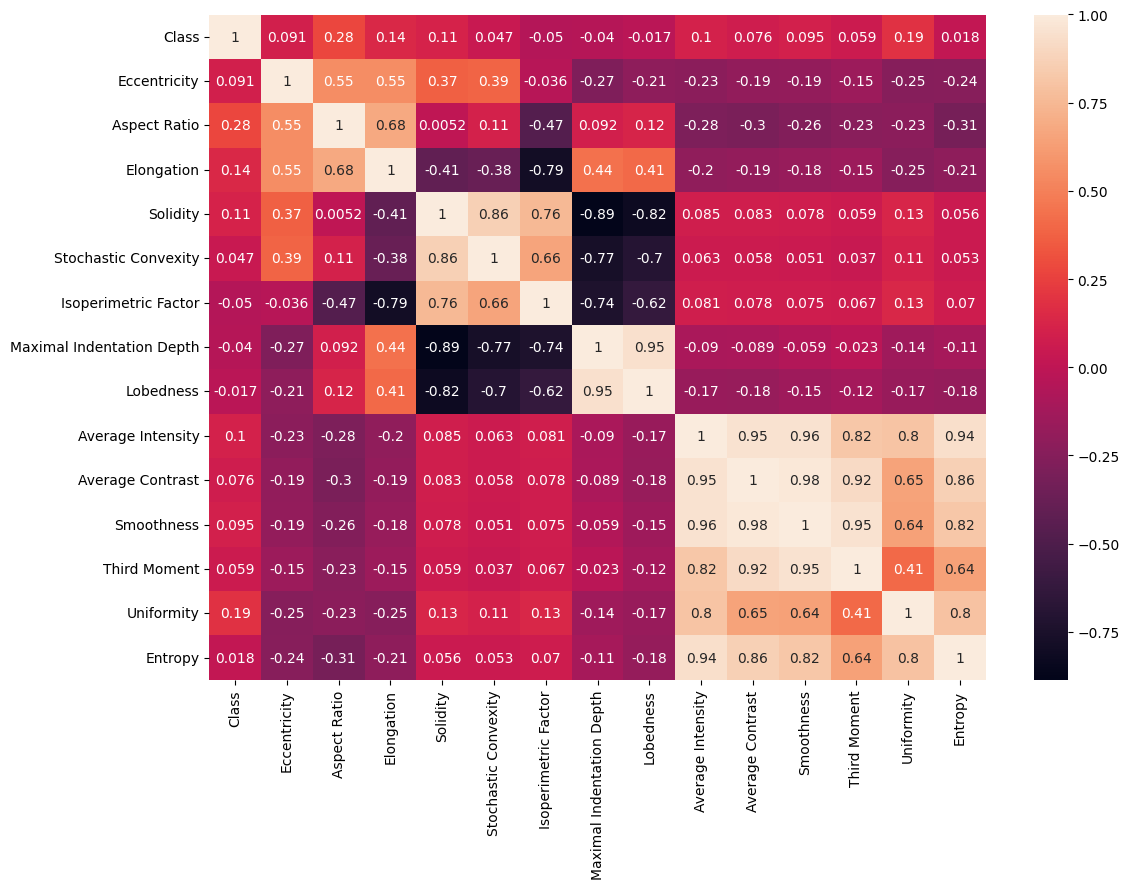

In [72]:
#define the column names
column_names = [ "Class", "Specimen Number", "Eccentricity",
                "Aspect Ratio", "Elongation", "Solidity", "Stochastic Convexity",
                 "Isoperimetric Factor", "Maximal Indentation Depth", "Lobedness",
                 "Average Intensity", "Average Contrast", "Smoothness", "Third Moment",
                 "Uniformity", "Entropy"]

#load the CSV with specified column names
data = pd.read_csv('leaf.csv', header=None, names=column_names)

print('Basic Information About the dataset: ')
data.info()

#explore data
data.head()

#check for missing values
data.isnull().sum()

#create new copy to modify
class_data = data.copy()

#remove implicit ordering of the Class label by making it a string
class_data["Class"] = class_data["Class"].astype(str)
class_data.drop(columns=["Specimen Number"], inplace=True)

#plot correlation matrix between features
plt.figure(figsize=(12, 9))
sns.heatmap(class_data.corr(), annot=True)
plt.tight_layout()
plt.show()

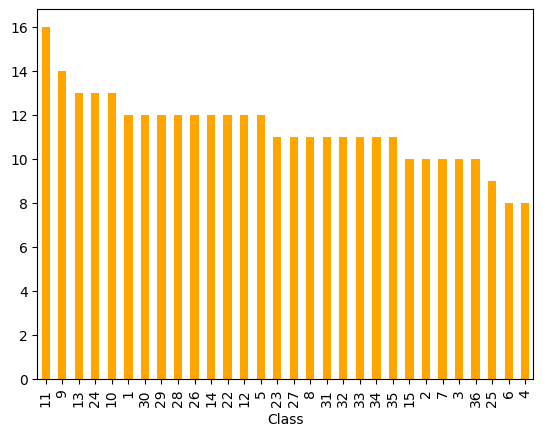

In [73]:
#separate x and y
x_features = class_data.loc[:, class_data.columns != 'Class']
y_target = class_data['Class']

#plot distribution of classes
y_target.value_counts().plot(kind="bar", color='orange')

#split the data into training and testing sets - stratify ensures that the resulting split conserves the ratio of every class
X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.2, stratify=y_target, random_state=42)

Best parameters: {'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__n_estimators': 100}
Best CV score: 0.7719191919191919
Balanced accuracy on the testing data: 0.7277777777777777
Weighted F1 score on the testing data: 0.7055672268907562
---Training time is: 0.3224918842315674 seconds ---


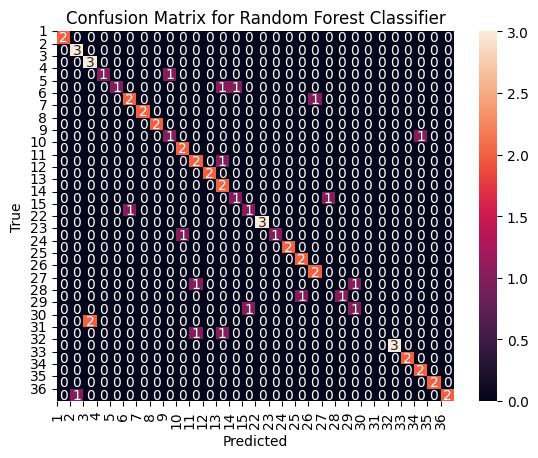

Best parameters: {'estimator__C': 100, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}
Best CV score: 0.7756228956228955
Balanced accuracy on the testing data: 0.7777777777777778
Weighted F1 score on the testing data: 0.7630252100840336
---Training time is: 0.02078104019165039 seconds ---


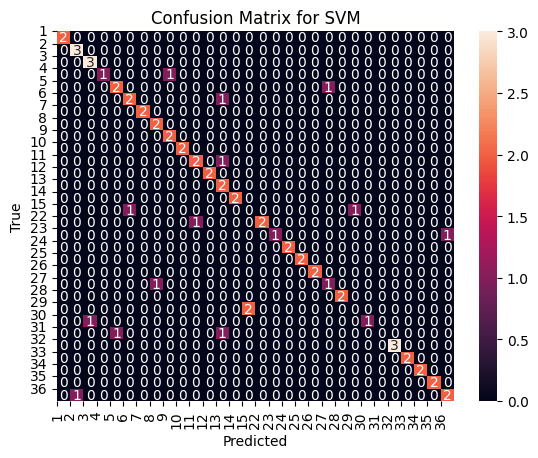

Best parameters: {'estimator__n_neighbors': 1}
Best CV score: 0.6874747474747473
Balanced accuracy on the testing data: 0.6944444444444444
Weighted F1 score on the testing data: 0.6749299719887955
---Training time is: 0.012453794479370117 seconds ---


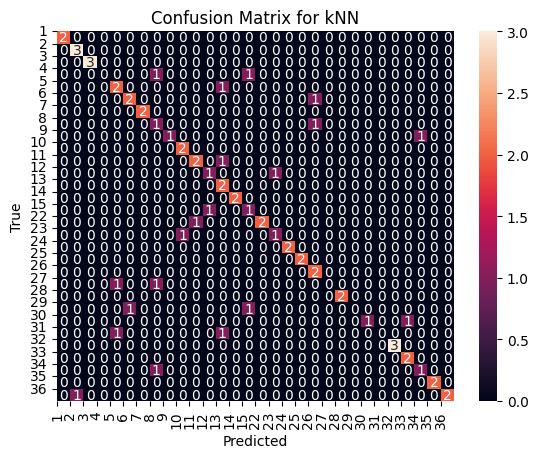

---Training time is: 0.014405012130737305 seconds ---
Best CV score: 0.7411764705882353
Balanced accuracy on the testing data: 0.6861442723942726
Weighted F1 score on the testing data: 0.6919988679132565


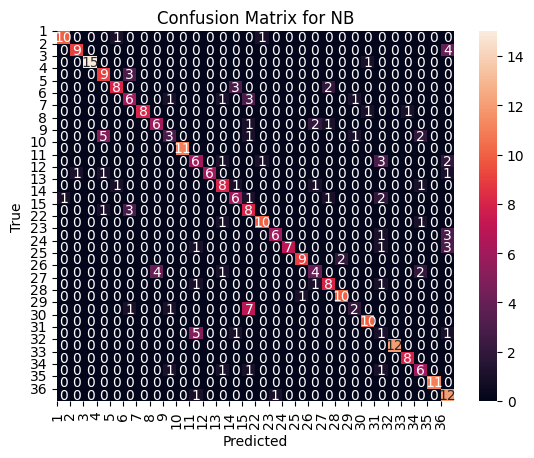

---Training time is: 0.0010502338409423828 seconds ---
Balanced accuracy on the testing data: 0.03333333333333333
Weighted F1 score on the testing data: 0.003728251864125932


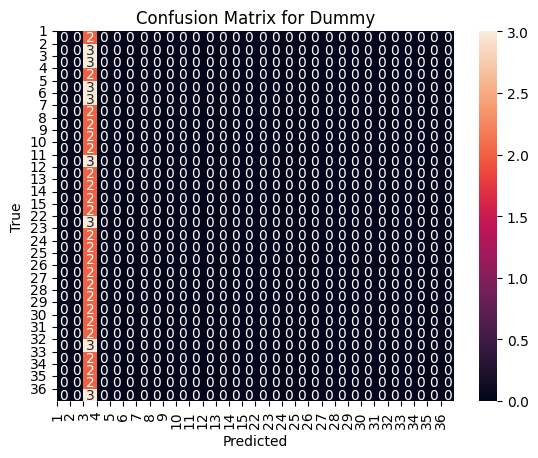

In [74]:
class_labels = class_data['Class'].unique()

#train, tune, and test the models
run_RFC(X_train, X_test, y_train, y_test, class_labels)
run_SVM(X_train, X_test, y_train, y_test, class_labels)
run_KNN(X_train, X_test, y_train, y_test, class_labels)
run_NB(x_features, y_target, class_labels)
run_Dummy(X_train, X_test, y_train, y_test, class_labels)